<a href="https://colab.research.google.com/github/Prashant-Shaw/Cardiovascular_Risk_Prediction/blob/main/Cardiovascular_Risk_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Cardiovascular Risk Prediction



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Name** - Prashant Shaw
##### **email** - prashantshaw77777@gmail.com 

# **Project Summary -**

The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.
Variables
Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk factors.
### Data Description
Demographic:
* Sex: male or female("M" or "F")
* Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

Behavioral:
* is_smoking: whether or not the patient is a current smoker ("YES" or "NO")
* Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

Medical(history):
* BP Meds: whether or not the patient was on blood pressure medication (Nominal)
* Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
* Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
* Diabetes: whether or not the patient had diabetes (Nominal)

Medical(current):
* Tot Chol: total cholesterol level (Continuous)
* Sys BP: systolic blood pressure (Continuous)
* Dia BP: diastolic blood pressure (Continuous)
* BMI: Body Mass Index (Continuous)
* Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
* Glucose: glucose level (Continuous)

Predict variable (desired target):
* 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) - DV

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Importing Libraries
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive

### Dataset Loading

In [ ]:
# Loading Dataset
drive.mount('/content/mydrive')
cvr_path = '/content/mydrive/MyDrive/AlmaBetter/Capstone Project - Supervised ML Classification/data_cardiovascular_risk.csv'
cvr_df = pd.read_csv(cvr_path)

Drive already mounted at /content/mydrive; to attempt to forcibly remount, call drive.mount("/content/mydrive", force_remount=True).


### Data Exploration

In [ ]:
#Checcking shape of the dataset
cvr_df.shape

(3390, 17)

There are 3390 rows and 17 features/columns in the dataset. Let's explore more to know the features.

In [ ]:
#Columns in the dataset
cvr_df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [ ]:
#Look at the dataset
cvr_df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


Categorical Variables - education, sex, is_smoking, BPMeds, prevalentStroke, prevalentHyp, diabetes, TenYearCHD (Target Variable).

Continuous Variables - age, cigsPerDay, totChol, sysBP, diaBP, BMI, heartRate, glucose

In [ ]:
#Datatype of each features
cvr_df.dtypes

id                   int64
age                  int64
education          float64
sex                 object
is_smoking          object
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

education and BPMeds are of float type but these are categorical variables. After filling the null values we will convert it to int dtype.

In [ ]:
#Info of the dataset
cvr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

we can see there are some feature which doesn't contains all the data. Let's explore more.

In [ ]:
#Checking duplicate values
cvr_df.nunique()

id                 3390
age                  39
education             4
sex                   2
is_smoking            2
cigsPerDay           32
BPMeds                2
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             240
sysBP               226
diaBP               142
BMI                1259
heartRate            68
glucose             132
TenYearCHD            2
dtype: int64

We can see that id has 3390 unique values. This shows that there is no duplicate entries in the dataset.

In [ ]:
#Checking null values in the dataset
cvr_df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

There are null values in education, cigsPerDay, BPMeds, totChol, BMI, heartRate and glucose feature. We will be filling the null values in the Data Cleaning section.

### What did you know about your dataset?

The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts.

There are 3390 rows and 17 features in the dataset.

"TenYearCHD" is the target or dependent variable and others are independent variable.

Our goal is to properly classify "TenYearCHD" based on the independent features present in the dataset.

There are some null values present we have to clean the null and do preprocessing to make the data ready for modelling.

### Data Cleaning

education and BPMeds are categorical variables. So, we will be filling the null values with mode of the data of the respective columns.
cigsPerDay, totChol, BMI, heartRate and glucose are continuous variables. We will be filling the null values with the median of the data of the respective columnns.

In [ ]:
#Displaying the rows where null values are present in cigsPerDay
cvr_df[cvr_df['cigsPerDay'].isnull()]

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
422,422,55,1.0,F,YES,NaN,0.0,0,1,0,213.0,163.0,91.0,28.66,69.0,66.0,0
466,466,45,3.0,M,YES,NaN,0.0,0,1,0,170.0,145.5,99.0,26.74,83.0,85.0,0
469,469,42,1.0,M,YES,NaN,0.0,0,0,0,196.0,123.0,73.0,22.06,66.0,NaN,0
491,491,61,1.0,F,YES,NaN,0.0,0,1,0,356.0,168.0,98.0,27.30,103.0,106.0,0
538,538,41,1.0,F,YES,NaN,0.0,0,0,0,171.0,135.0,82.5,24.35,79.0,82.0,0
767,767,54,1.0,M,YES,NaN,0.0,0,0,0,219.0,110.0,72.0,26.05,95.0,86.0,0
1461,1461,47,2.0,F,YES,NaN,0.0,0,0,0,365.0,127.0,76.0,24.44,72.0,80.0,0
1467,1467,49,1.0,F,YES,NaN,0.0,0,0,0,252.0,123.0,69.0,21.45,72.0,89.0,0
1597,1597,57,NaN,F,YES,NaN,0.0,0,0,0,229.0,115.0,69.0,24.43,80.0,93.0,0
1986,1986,49,2.0,F,YES,NaN,0.0,0,1,0,233.0,158.0,102.0,25.31,90.0,72.0,0


In [ ]:
#Checking median for cigsPerDay
cvr_df['cigsPerDay'].median()

0.0

The median for cigsPerDay is coming as zero and if we are filling the null values of cigsPerDay as zero it will not be correct as in is_smoking it is mentioned as Yes. So, we will be filling the null values of cigsPerDay with mean of the data.

In [ ]:
#Function to fill the null values with mode
def fill_null_mode(cols):
  ''' This function fills the null values of any columns with mode of the data.
  pass the list of column names for which you want to fill the null values'''
  for col in cols :
    cvr_df[col] = cvr_df[col].fillna(round(cvr_df[col].mode()[0],1))

In [ ]:
#Function to fill the null values with median
def fill_null_median(cols):
  ''' This function fills the null values of any columns with median of the data.
  pass the column name for which you want to fill the null values'''
  for col in cols:
    cvr_df[col] = cvr_df[col].fillna(cvr_df[col].median())

In [ ]:
#Filling the null values
fill_null_mode(['education','BPMeds'])
fill_null_median(['totChol','BMI','heartRate','glucose'])
cvr_df['cigsPerDay'] = cvr_df['cigsPerDay'].fillna(round(cvr_df['cigsPerDay'].mean(),1))

In [ ]:
#Confirming if all the null values are filled
cvr_df.isnull().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

We have successfully filled all the null values in the dataset.

In [ ]:
#Description of the data after filling all the null values
cvr_df.describe(include = 'all')

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3390.000000,3390,3390,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.00000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000
unique,NaN,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,F,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1923,1703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1694.500000,49.542183,1.946018,NaN,NaN,9.069676,0.029499,0.006490,0.315339,0.025664,237.039823,132.60118,82.883038,25.793251,75.976991,81.720059,0.150737
std,978.753033,8.592878,1.017568,NaN,NaN,11.840458,0.169224,0.080309,0.464719,0.158153,44.994205,22.29203,12.023581,4.107026,11.970114,23.161265,0.357846
min,0.000000,32.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.030000,68.000000,72.000000,0.000000
50%,1694.500000,49.000000,2.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,NaN,NaN,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,27.997500,83.000000,85.000000,0.000000


In [ ]:
#education and BPMeds are categorical variables. Converting the datatype from float to int.
cvr_df['education'] = cvr_df['education'].astype(int)
cvr_df['BPMeds'] = cvr_df['BPMeds'].astype(int)

In [ ]:
#Checking the info of the dataset after doing data cleaning.
cvr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3390 non-null   int64  
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3390 non-null   float64
 6   BPMeds           3390 non-null   int64  
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3390 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3390 non-null   float64
 14  heartRate        3390 non-null   float64
 15  glucose          3390 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(7),

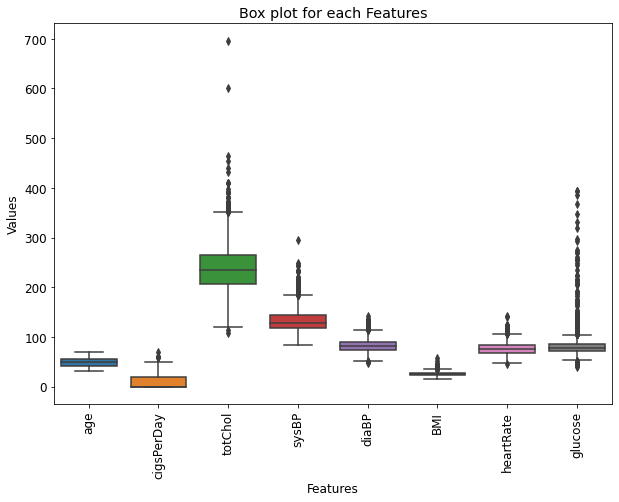

In [ ]:
#Plotting the box plot for each feature.
plt.figure(figsize = (10,7))
plt.title("Box plot for each Features")
sns.boxplot(data = cvr_df[['age','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']])
plt.xticks(rotation = 90)
plt.xlabel("Features")
plt.ylabel("Values")
plt.show()

Form the above graph we can infer that there are some outliers in some features especially in totChol, sysBP and glucose but in this project we have decided not to remove those feature as these features are critical in predicting the ten year CHD and life of a person depends on these data so, we decided to work with these outliers.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

Let's explore each features one by one.

In [ ]:
#Function to plot Bar graph
def bar_graph(col):
  '''This function plots the bar_graph for the given data.
  Pass the feature name (str) to plot the graph'''
  plt.figure(figsize = (20,7))
  plt.title(f'Distribution of {col}')
  sns.countplot(x=col,data=cvr_df)
  plt.xticks(rotation = 90)
  plt.show()

In [ ]:
#Function to plot Pie chart
def pie_chart(col):
  '''This function plot the pie chart for the given data.
  Pass the feature name in str to plot the pie chart.'''
  plt.rcParams['font.size'] = 12
  plt.figure(figsize = (7,7))
  exp = (0.05,)*len(cvr_df[col].value_counts())
  cvr_df[col].value_counts().plot.pie(autopct = '%1.2f%%', explode = exp)
  plt.title(f'{col} percentage distribution')
  plt.axis('off')
  plt.show()

In [ ]:
#Function to plot the feature distribution with respect to TenYearCHD
def bar_wrt_TenYearCHD(col):
  '''This function plot the distribution for a given feature with respect to TenYearCHD.
  Pass the feature name in str to plot the graph.'''
  if len(cvr_df.groupby([col,'TenYearCHD'])['id'].count())>60:
    plt.figure(figsize = (50,15))
  else:
    plt.figure(figsize = (15,7))
  plt.title(f'{col} distribution with respect to TenYearCHD')
  sns.barplot(x = col, y = 'id', hue = 'TenYearCHD',data = cvr_df.groupby([col,'TenYearCHD'])['id'].count().reset_index())
  plt.xticks(rotation = 90)
  plt.show()

In [ ]:
#Function to plot histplot for numeric variables
def hist_num(col):
  '''This function plot the distribution for a given feature.
  Pass the feature name in str to plot the graph.'''
  plt.figure(figsize = (20,7))
  plt.title(f'{col} ')
  sns.histplot(data = cvr_df[col], kde = True)
  plt.show()

####TenYearCHD

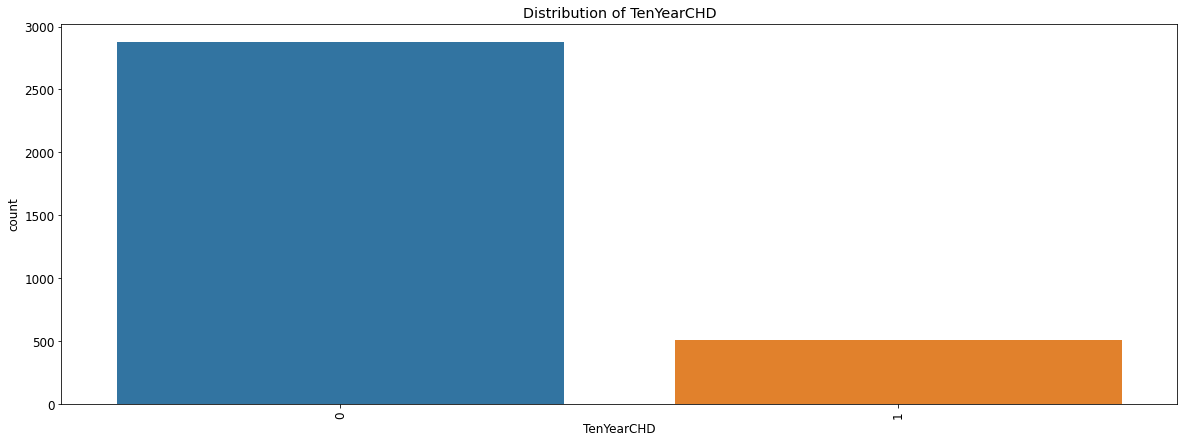

In [ ]:
#"Distribution of feature "TenYearCHD".
bar_graph("TenYearCHD")

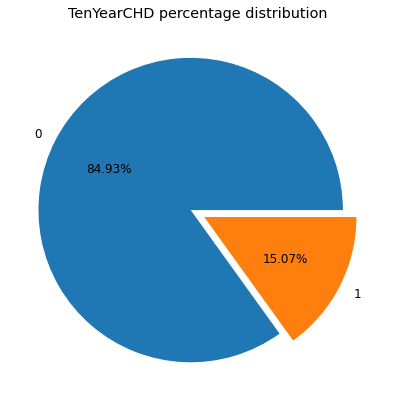

In [ ]:
#Distribution of percentage "TenYearCHD" feature.
pie_chart("TenYearCHD")

TenYearCHD is dependent variable in the dataset. As it is a categorical variable predicting this will be a classification probelem.

Here class 1 means there is a risk of coronary heart disease and class 0 means there is no risk of coronary heart disease.

We can infer from the pie chart that our dataset contains 85% class 0 and 15% class 1 entries. This clearly shows that there is class imbalance in the dataset.

We will be handling class imbalance in later part of the project.

#### age

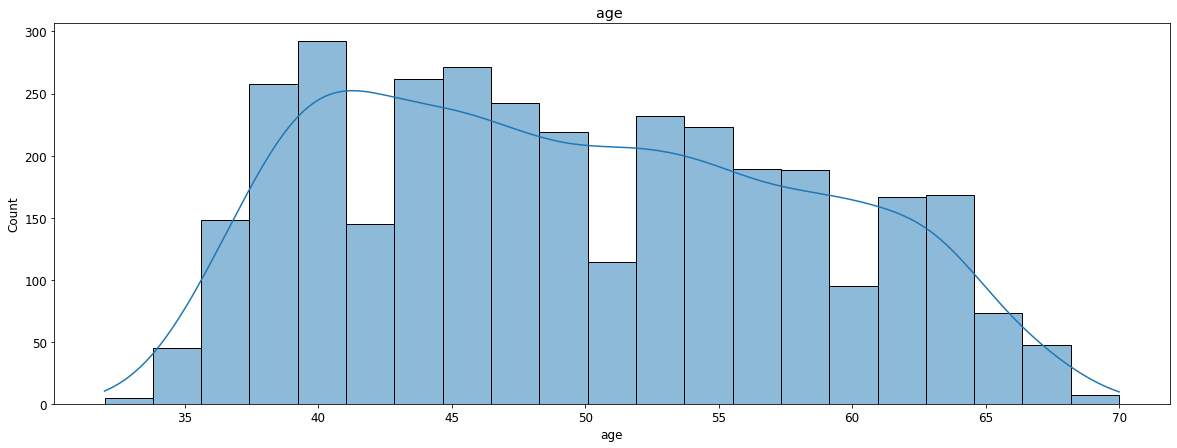

In [ ]:
#Distribution of "age" feature.
hist_num('age')

Age is normally distributed between 35 to 70 where most number of people belongs to age group 40.

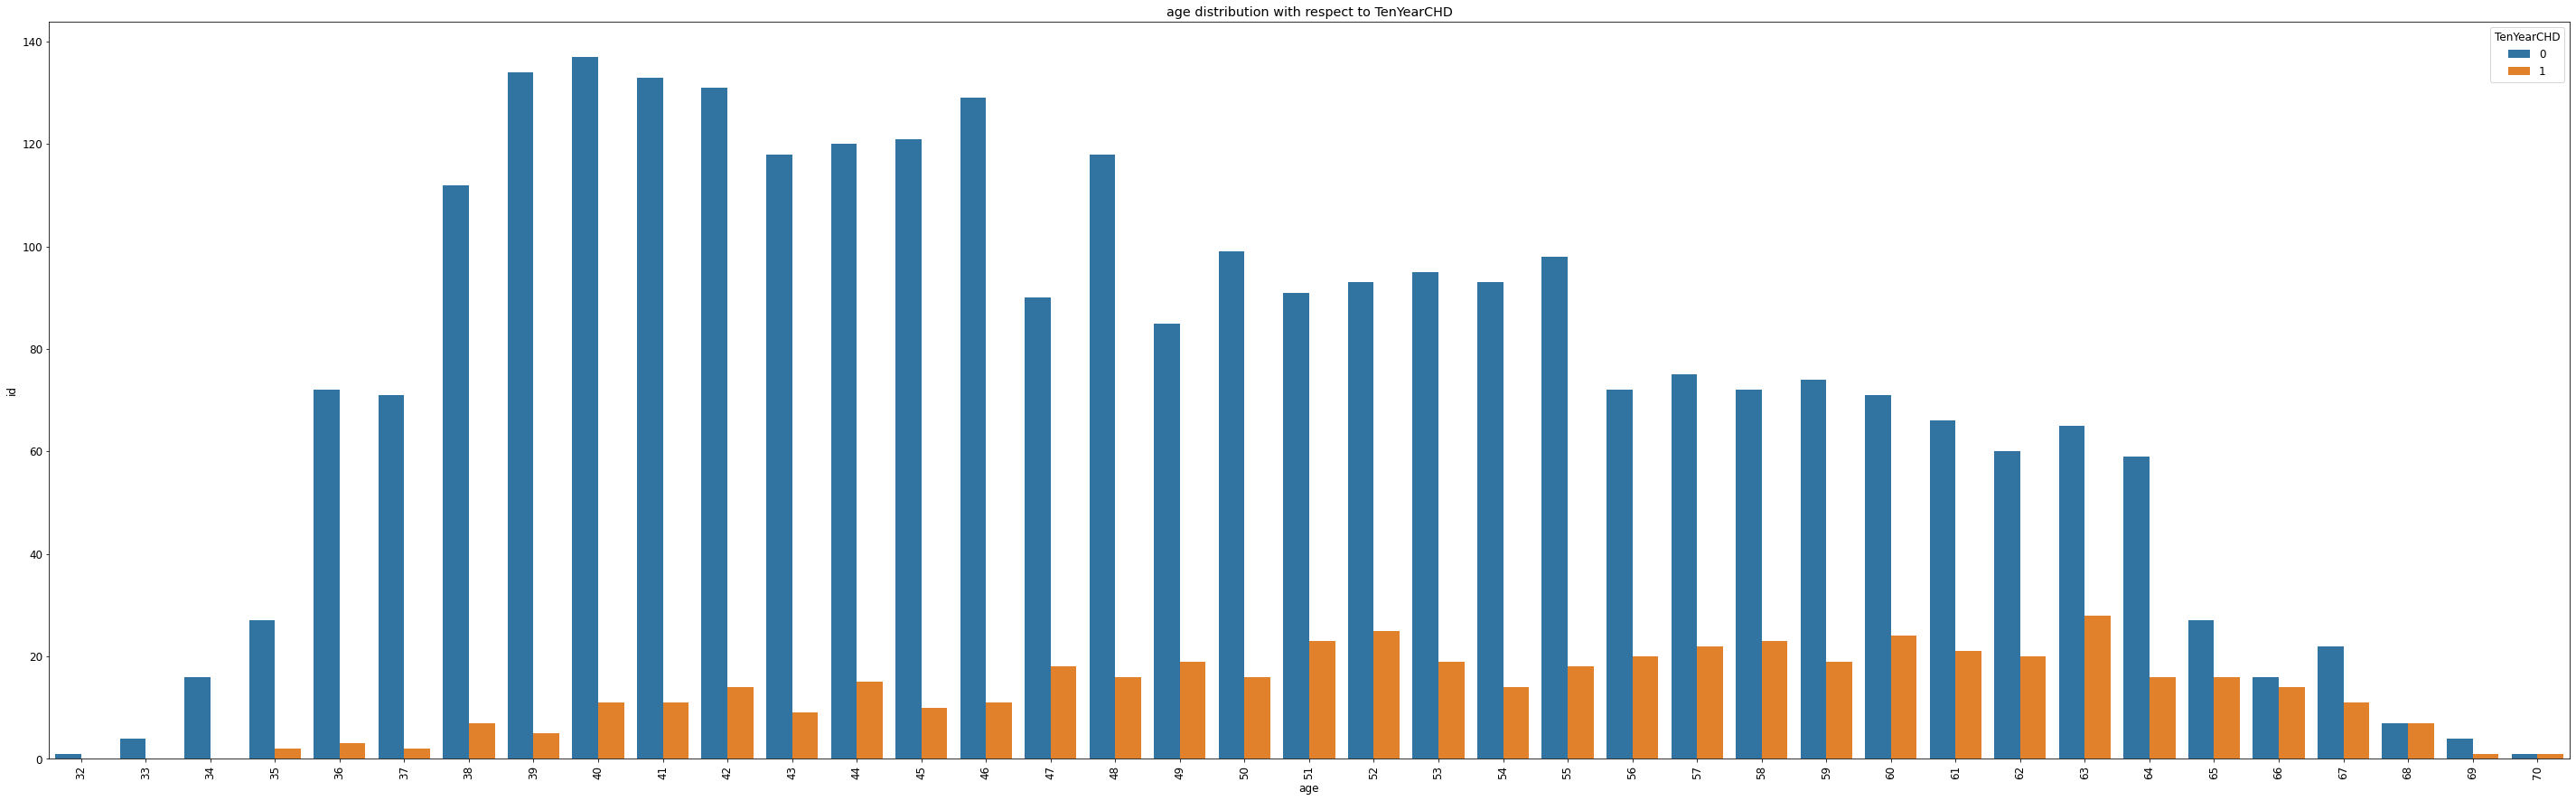

In [ ]:
#Distribution of "age" feature with respect to "TenYearCHD".
bar_wrt_TenYearCHD('age')

The risk of CHD increases as the age increases from 35. People with age around 63 are at the highest risk of CHD.

#### education

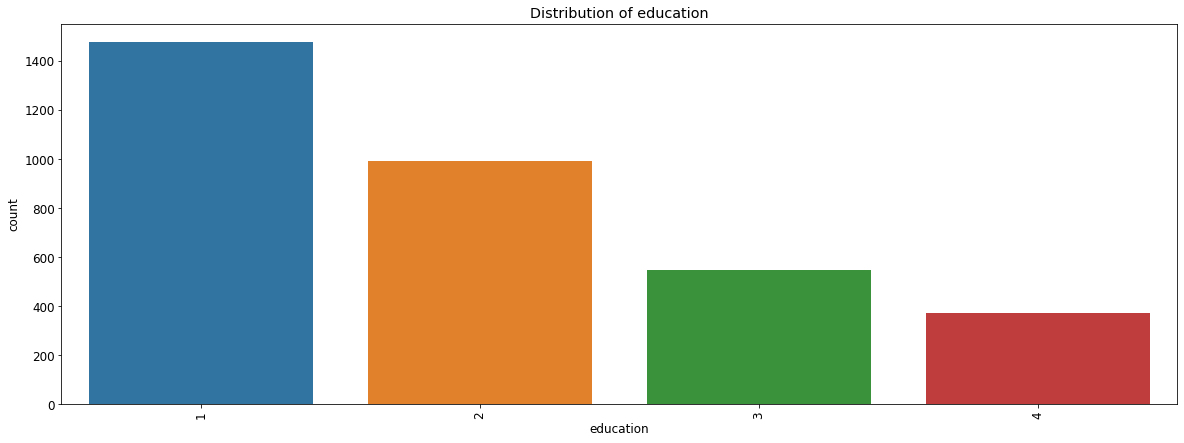

In [ ]:
#Distribution of feature "education".
bar_graph("education")

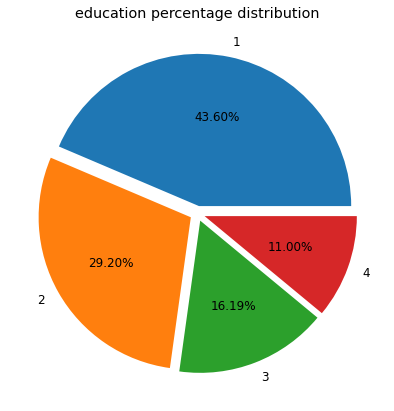

In [ ]:
#Distribution of percentage "education" feature.
pie_chart("education")

There is no clear information given about education feature but we can infer from the graph that more number of people are from type 1.

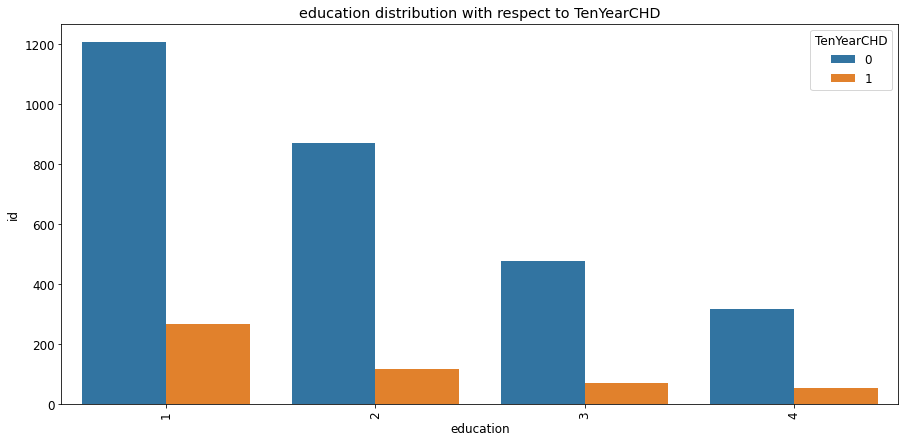

In [ ]:
#Distribution of "education" feature with respect to "TenYearCHD".
bar_wrt_TenYearCHD("education")

People belonging to education type 1 are at a higher risk of CHD then type 2 and type 3, people belonging to type 4 education are at the lowest risk of having CHD.

#### sex

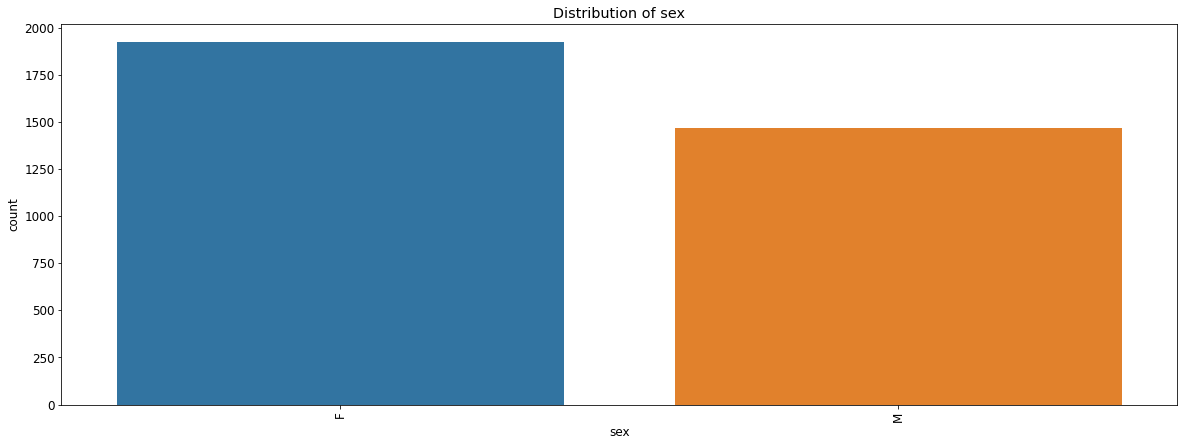

In [ ]:
#Distribution of feature "sex".
bar_graph("sex")

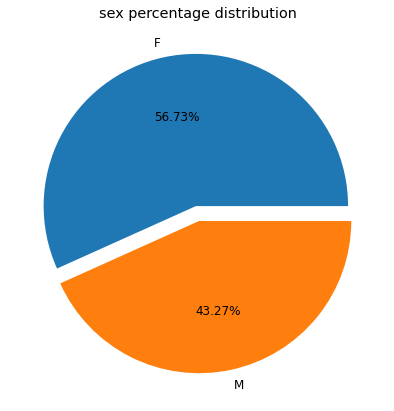

In [ ]:
#Distribution of percentage "sex" feature.
pie_chart("sex")

There are more number of Females than Males in the dataset.

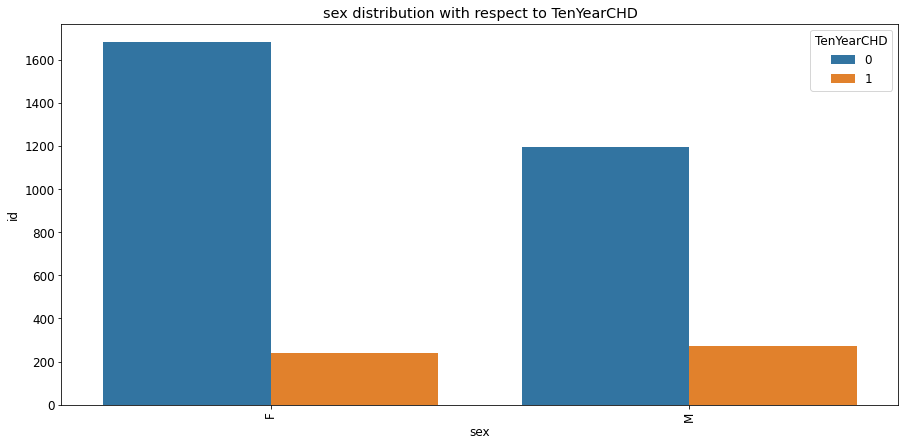

In [ ]:
#Distribution of "sex" feature with respect to "TenYearCHD".
bar_wrt_TenYearCHD("sex")

Even though the number of males are less than number of females in the dataset still males are having more risk of 10yr CHD as compared to females.

#### is_smoking

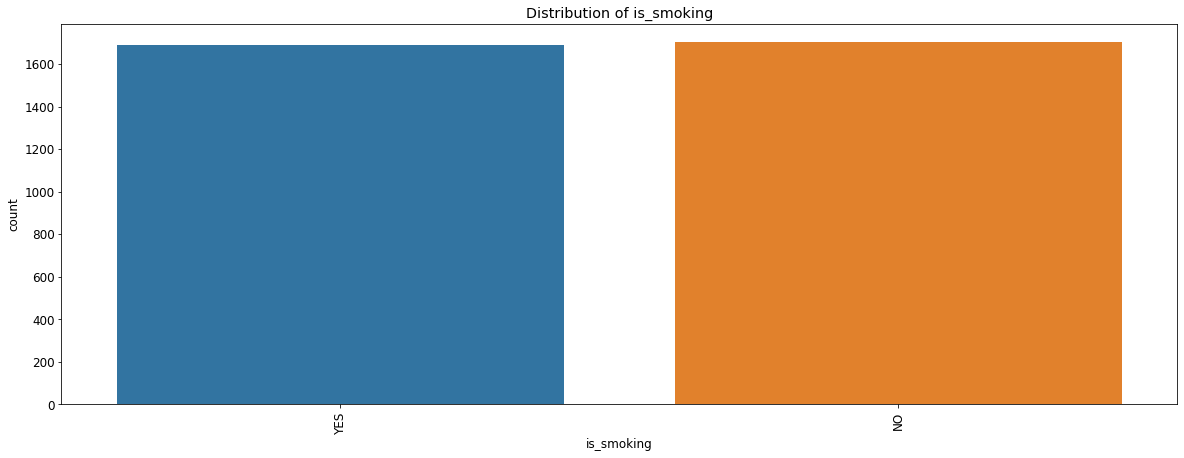

In [ ]:
#Distribution of feature "is_smoking".
bar_graph("is_smoking")

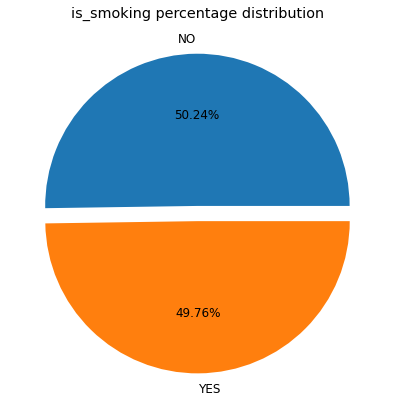

In [ ]:
#Distribution of percentage "is_smoking" feature.
pie_chart("is_smoking")

Number of smokers and non-smokers are almost equal in the dataset.

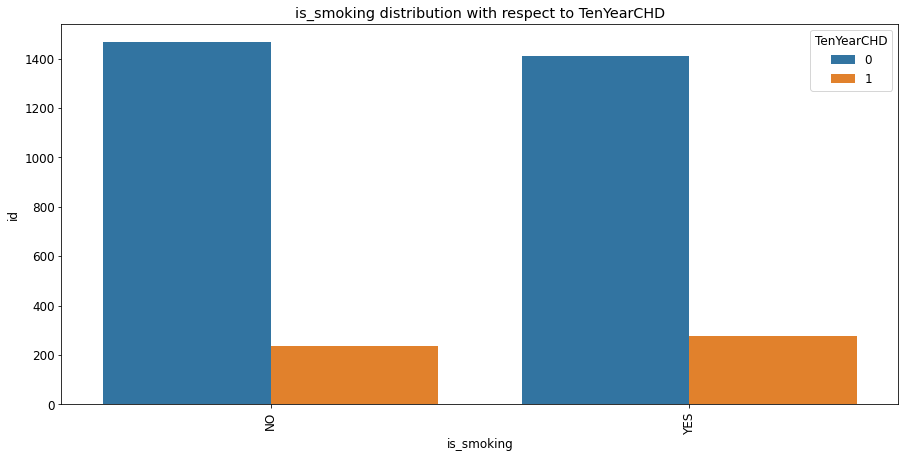

In [ ]:
#Distribution of "is_smoking" feature with respect to "TenYearCHD".
bar_wrt_TenYearCHD("is_smoking")

Risk of 10 yr CHD is more for smokers than non smokers. This feature is not the only contirbuting factor to CHD there are several other features which will effect the risk of CHD.

#### cigsPerDay

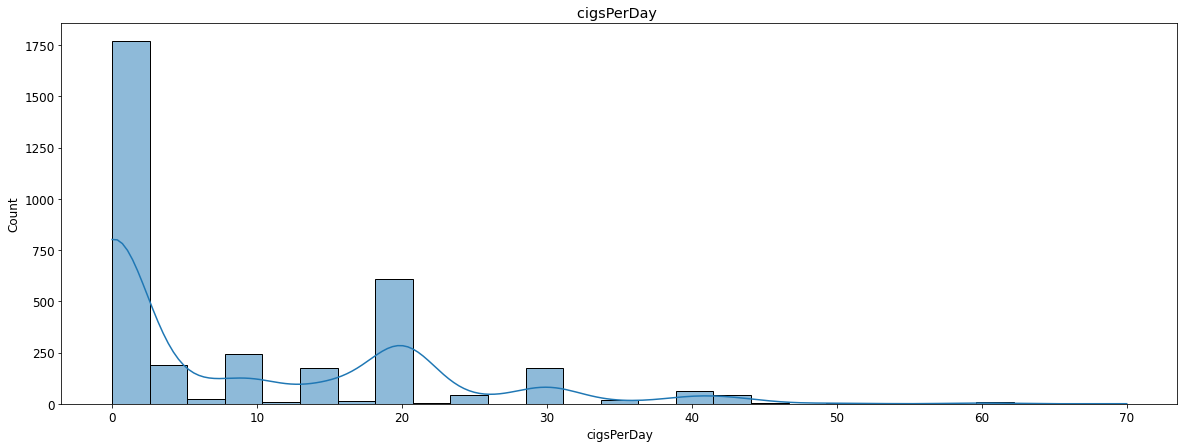

In [ ]:
#Distribution of feature "cigsPerDay".
hist_num("cigsPerDay")

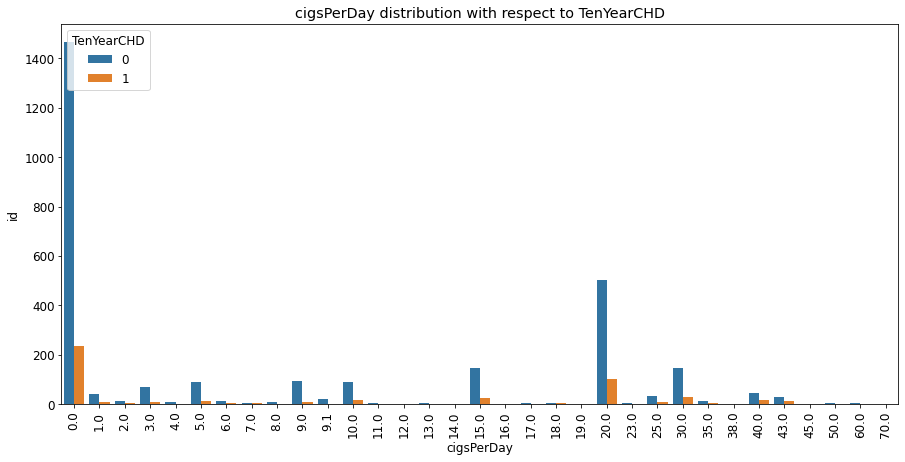

In [ ]:
#Distribution of "cigsPerDay" feature with respect to "TenYearCHD".
bar_wrt_TenYearCHD("cigsPerDay")

In [ ]:
# cvr_cigs_df = cvr_df.groupby(['cigsPerDay','TenYearCHD'])['id'].count().reset_index()
if cvr_cigs_df["cigsPerDay"] > 0.0:
  a = cvr_df.groupby(['cigsPerDay','TenYearCHD'])['id'].count().reset_index()

NameError: ignored

#### BPMeds

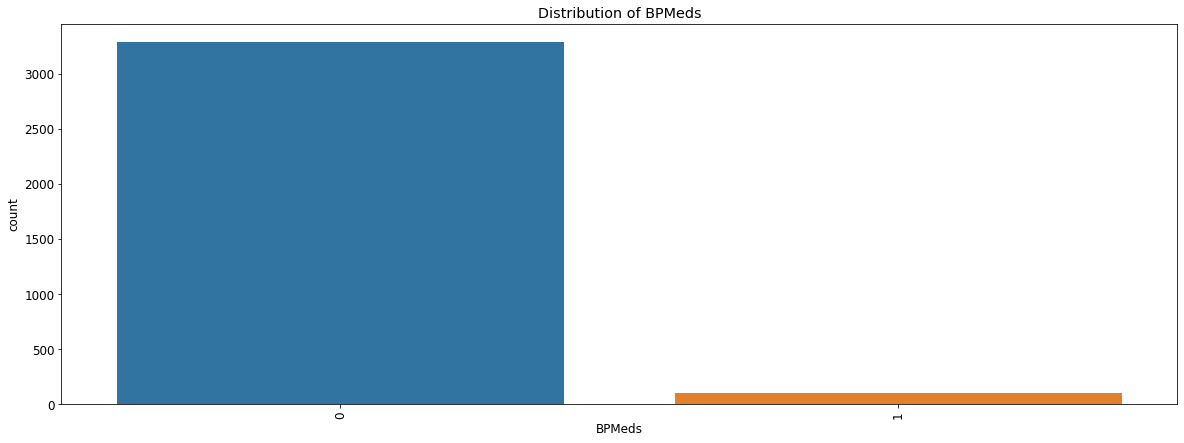

In [ ]:
#Distribution of feature "BPMeds".
bar_graph("BPMeds")

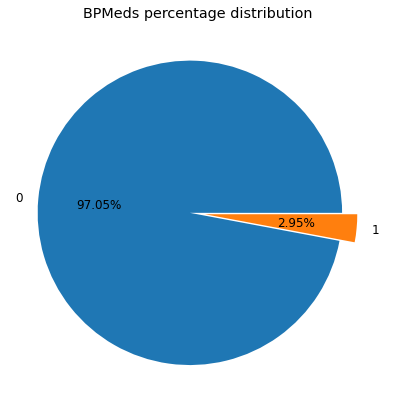

In [ ]:
#Distribution of percentage "BPMeds" feature.
pie_chart("BPMeds")

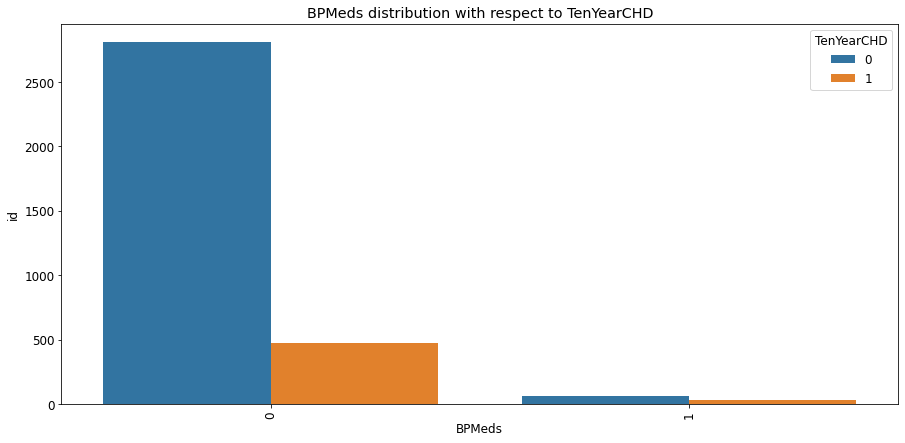

In [ ]:
#Distribution of "BPMeds" feature with respect to "TenYearCHD".
bar_wrt_TenYearCHD("BPMeds")

#### prevalentStroke

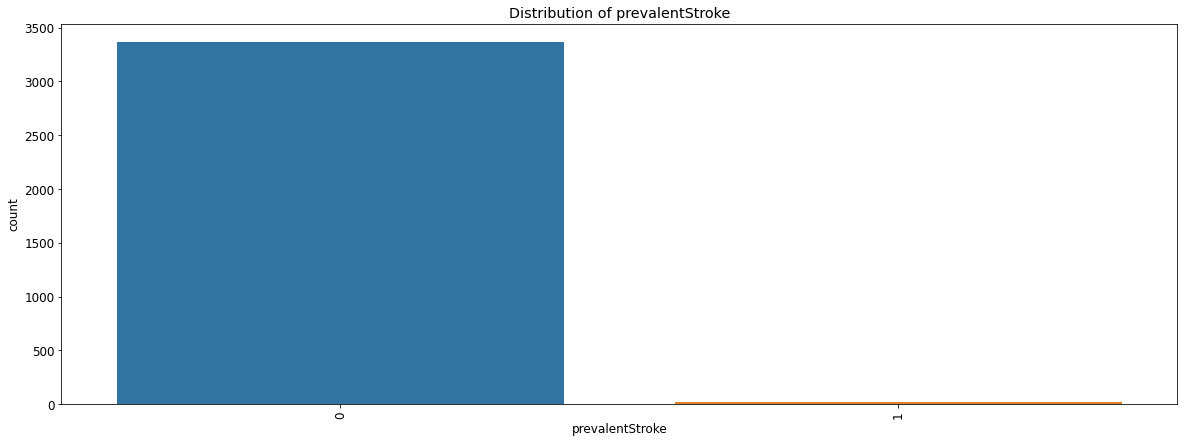

In [ ]:
#Distribution of feature "prevalentStroke".
bar_graph("prevalentStroke")

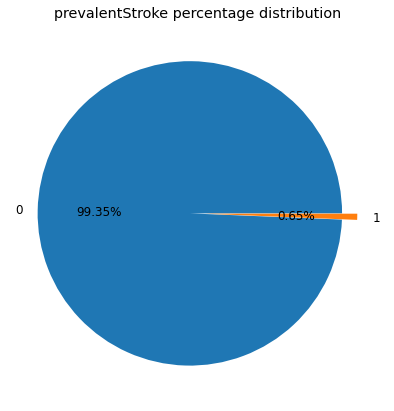

In [ ]:
#Distribution of percentage "prevalentStroke" feature.
pie_chart("prevalentStroke")

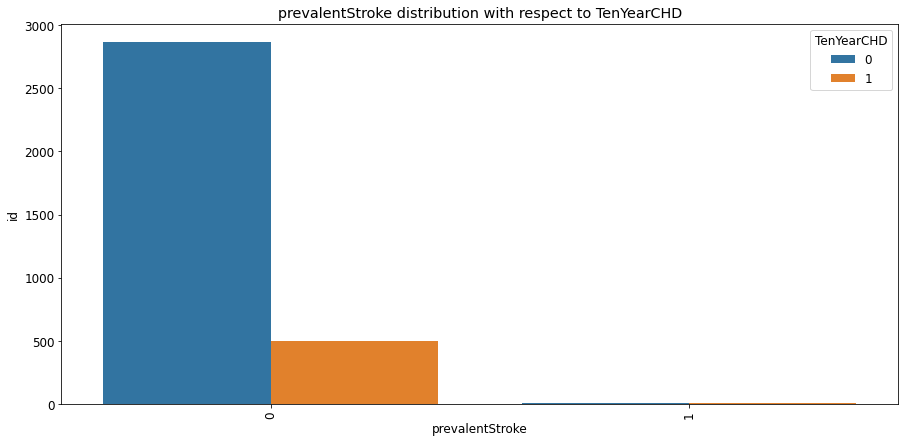

In [ ]:
#Distribution of "prevalentStroke" feature with respect to "TenYearCHD".
bar_wrt_TenYearCHD("prevalentStroke")

#### prevalentHyp

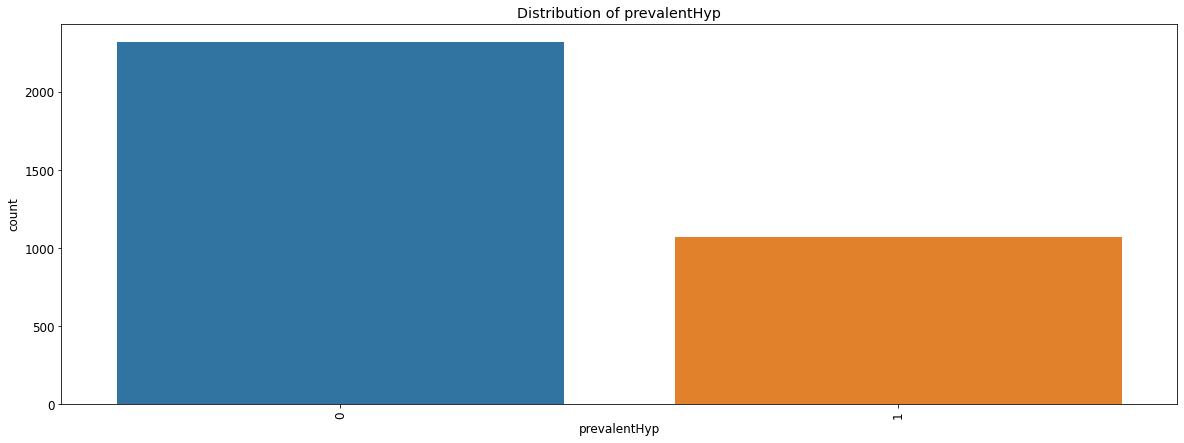

In [ ]:
#Distribution of feature "prevalentHyp".
bar_graph("prevalentHyp")

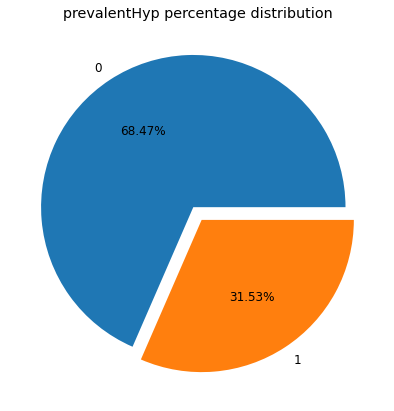

In [ ]:
#Distribution of percentage "prevalentHyp" feature.
pie_chart("prevalentHyp")

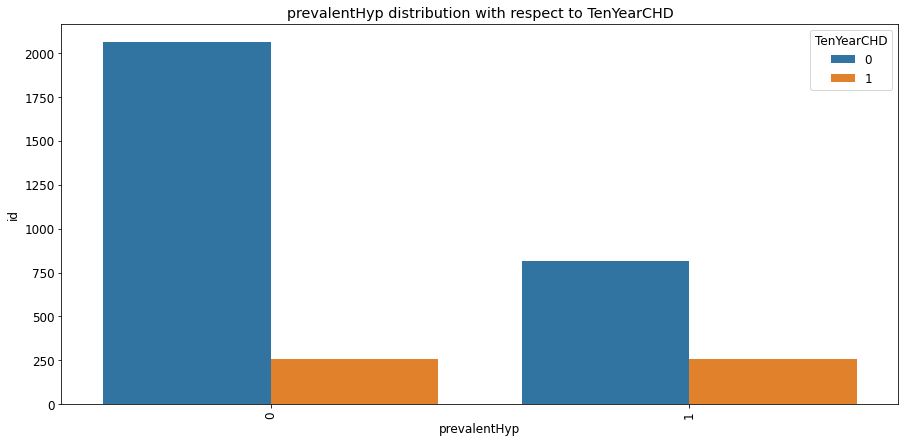

In [ ]:
#Distribution of "prevalentHyp" feature with respect to "TenYearCHD".
bar_wrt_TenYearCHD("prevalentHyp")

#### diabetes

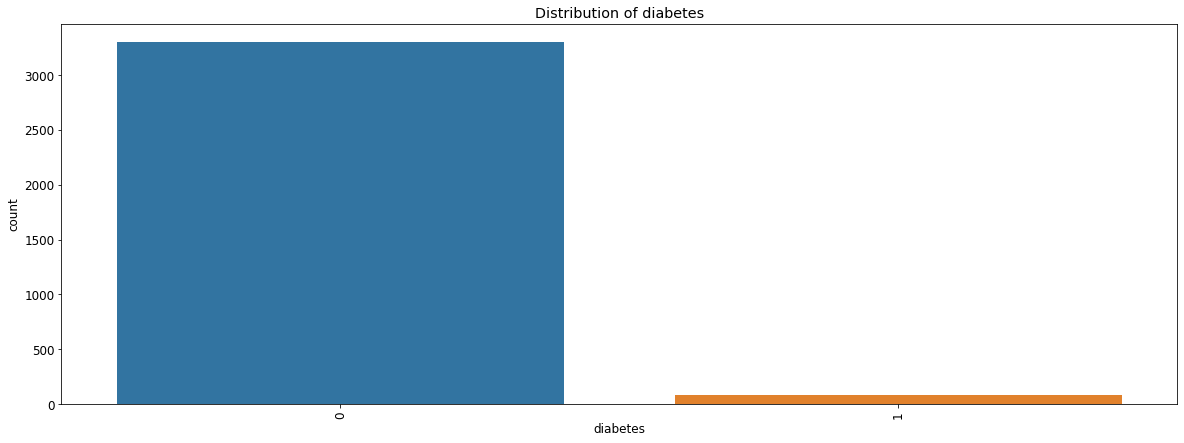

In [ ]:
#Distribution of feature "diabetes".
bar_graph("diabetes")

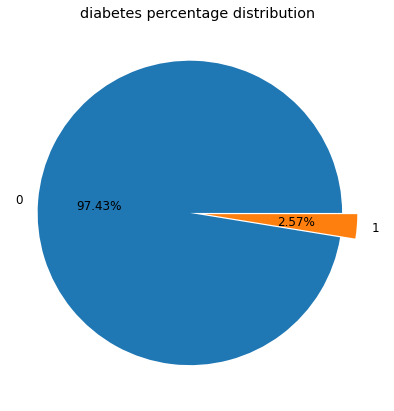

In [ ]:
#Distribution of percentage "diabetes" feature.
pie_chart("diabetes")

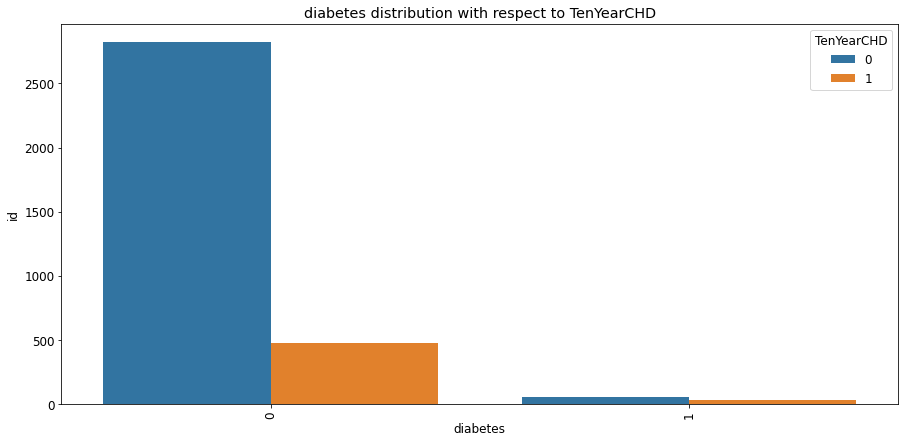

In [ ]:
#Distribution of "diabetes" feature with respect to "TenYearCHD".
bar_wrt_TenYearCHD("diabetes")

#### totChol

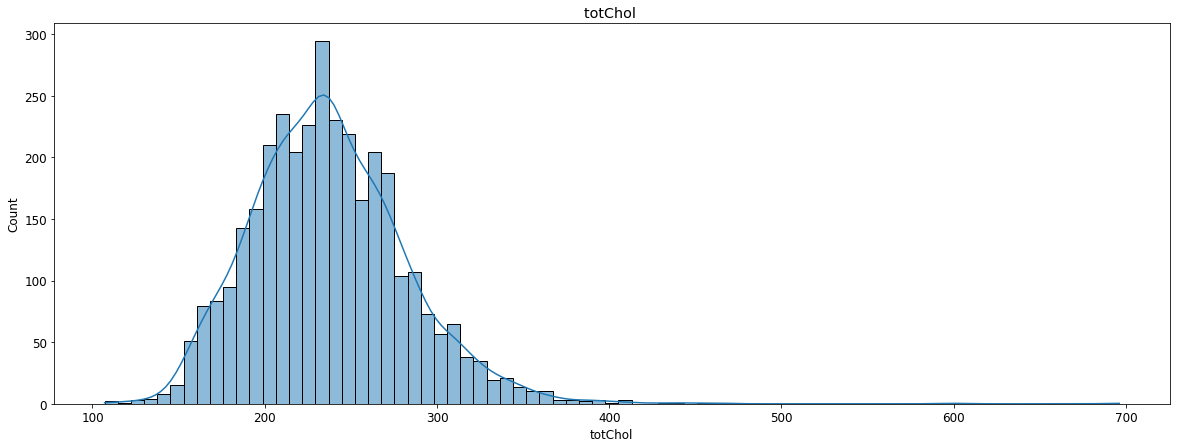

In [ ]:
#Distribution of feature "totChol".
hist_num("totChol")

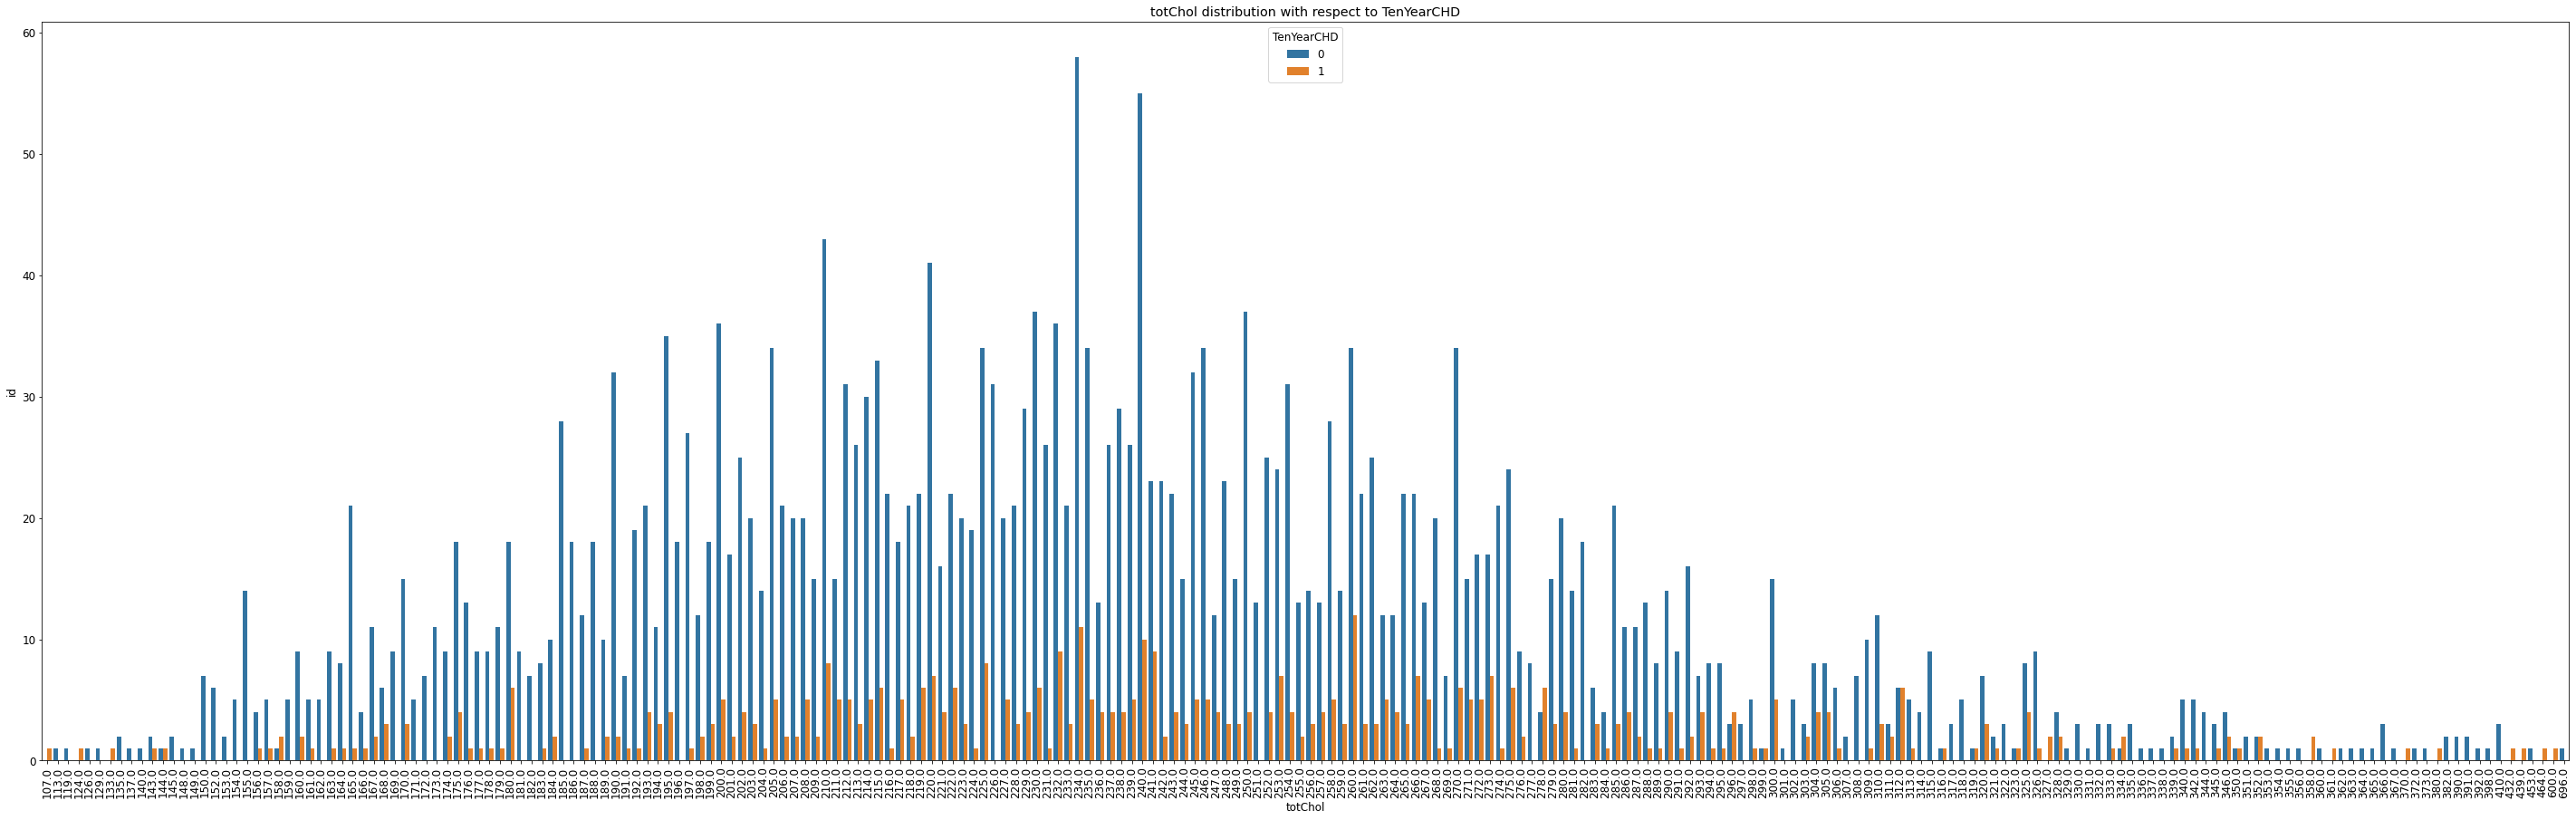

In [ ]:
#Distribution of "totChol" feature with respect to "TenYearCHD".
bar_wrt_TenYearCHD("totChol")

####sysBP

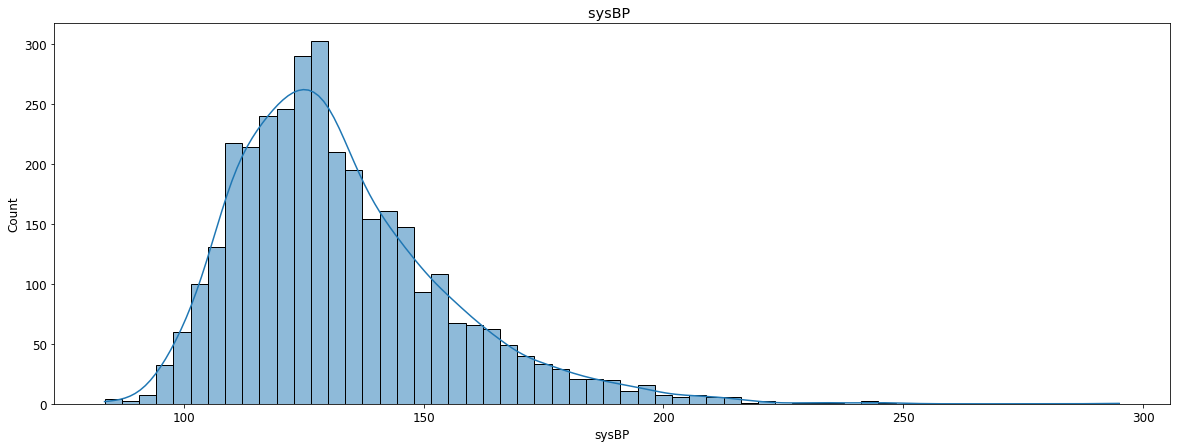

In [ ]:
#Distribution of feature "sysBP".
hist_num("sysBP")

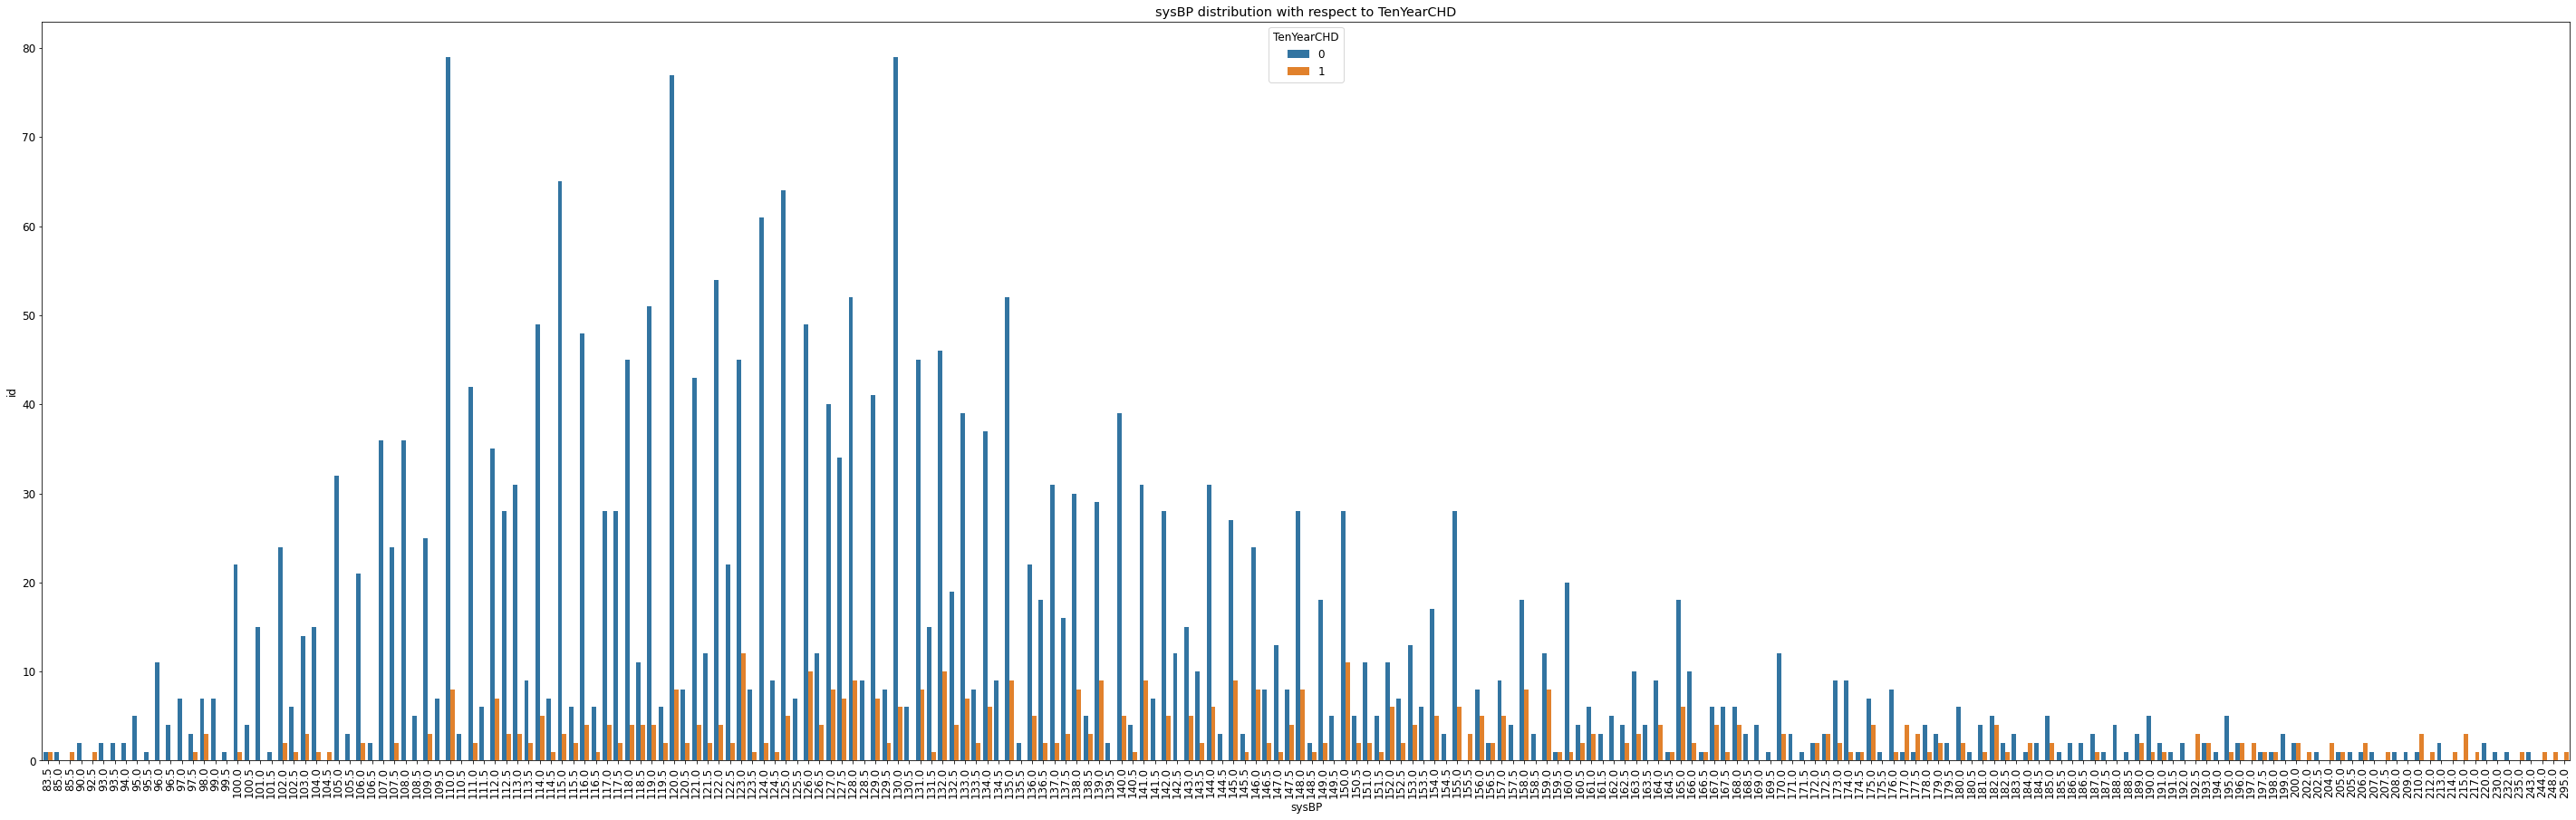

In [ ]:
#Distribution of "sysBP" feature with respect to "TenYearCHD".
bar_wrt_TenYearCHD("sysBP")

####diaBP

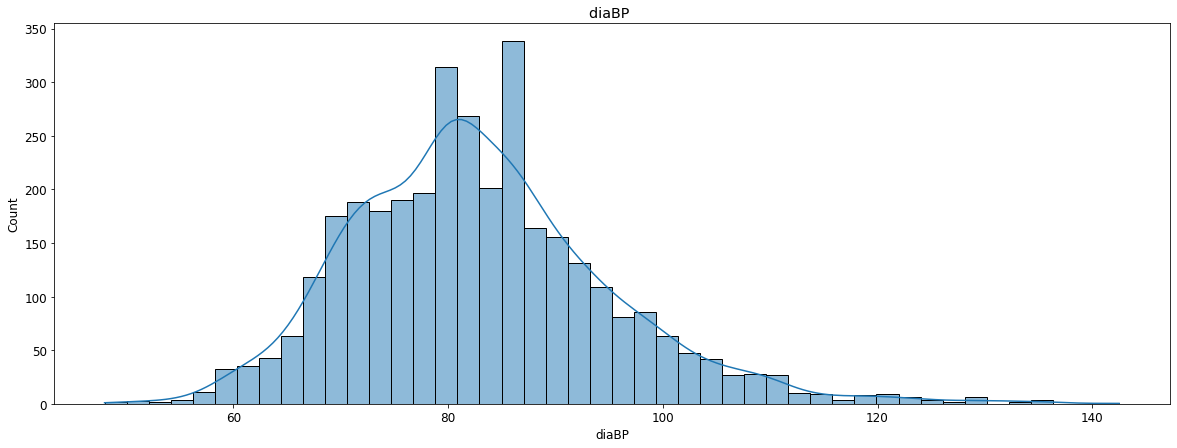

In [ ]:
#Distribution of feature "diaBP".
hist_num("diaBP")

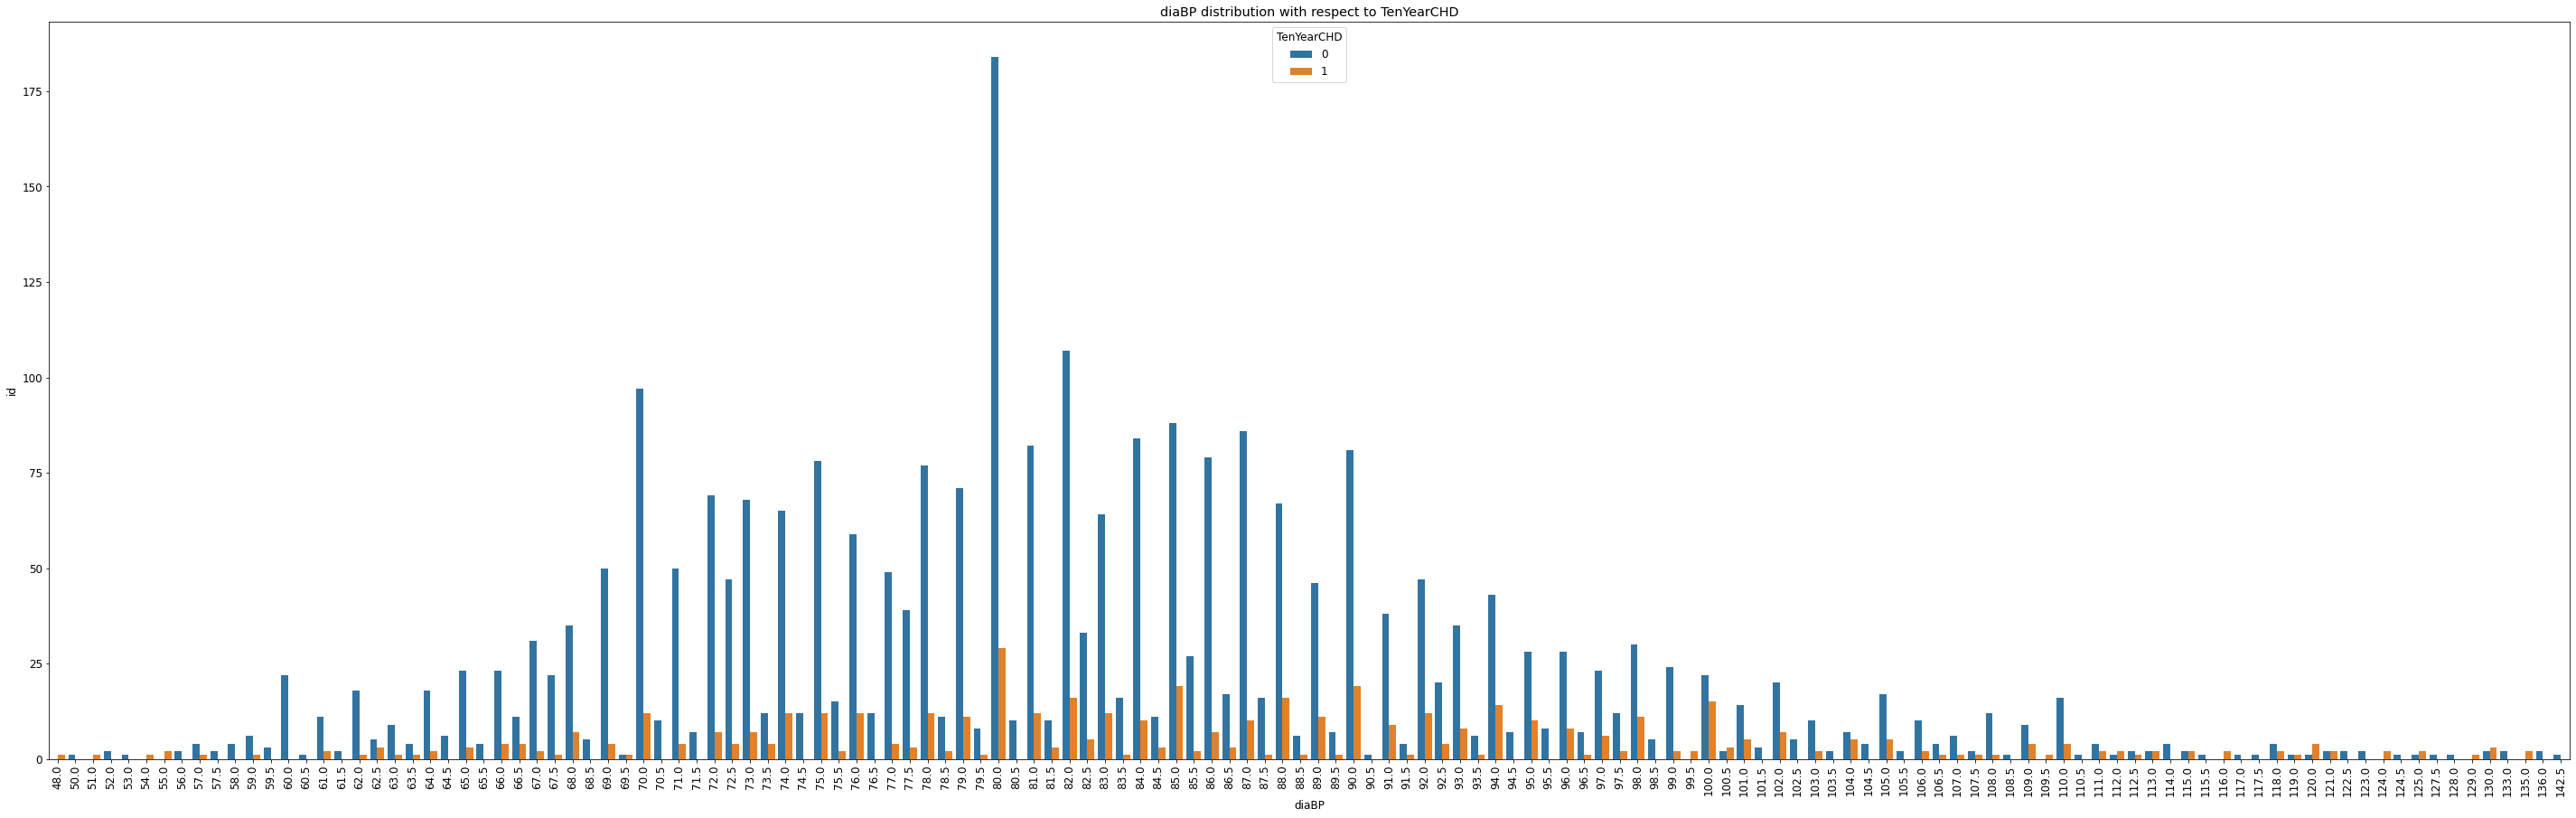

In [ ]:
#Distribution of "diaBP" feature with respect to "TenYearCHD".
bar_wrt_TenYearCHD("diaBP")

####BMI

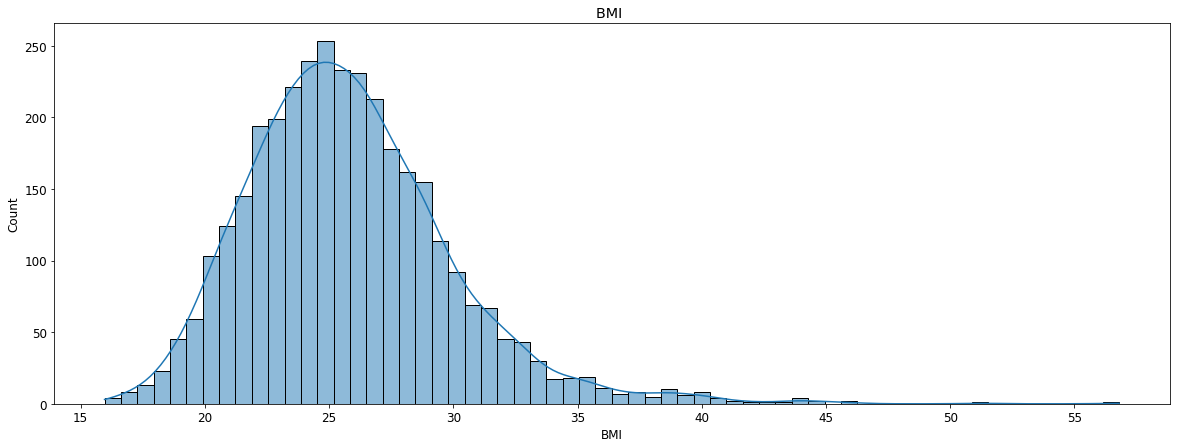

In [ ]:
#Distribution of feature "BMI".
hist_num("BMI")

####heartRate

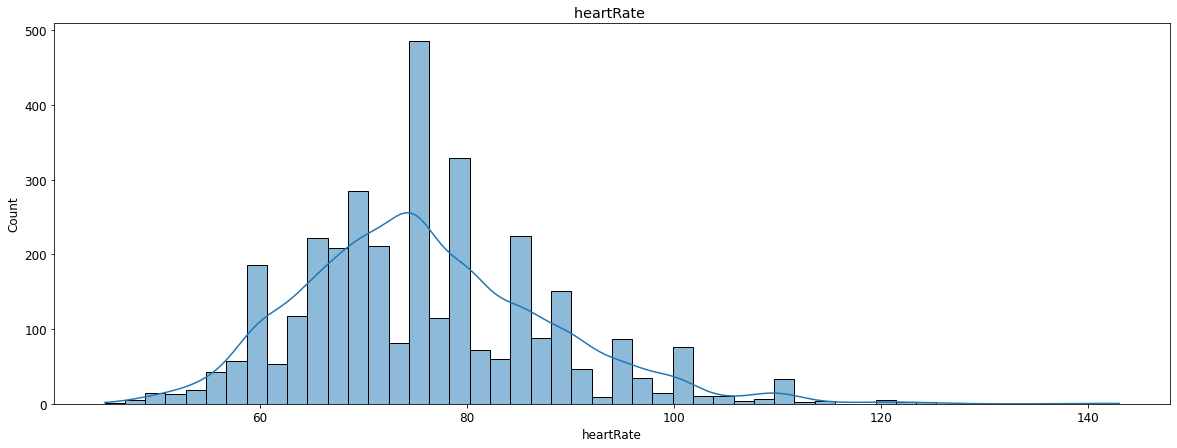

In [ ]:
#Distribution of feature "heartRate".
hist_num("heartRate")

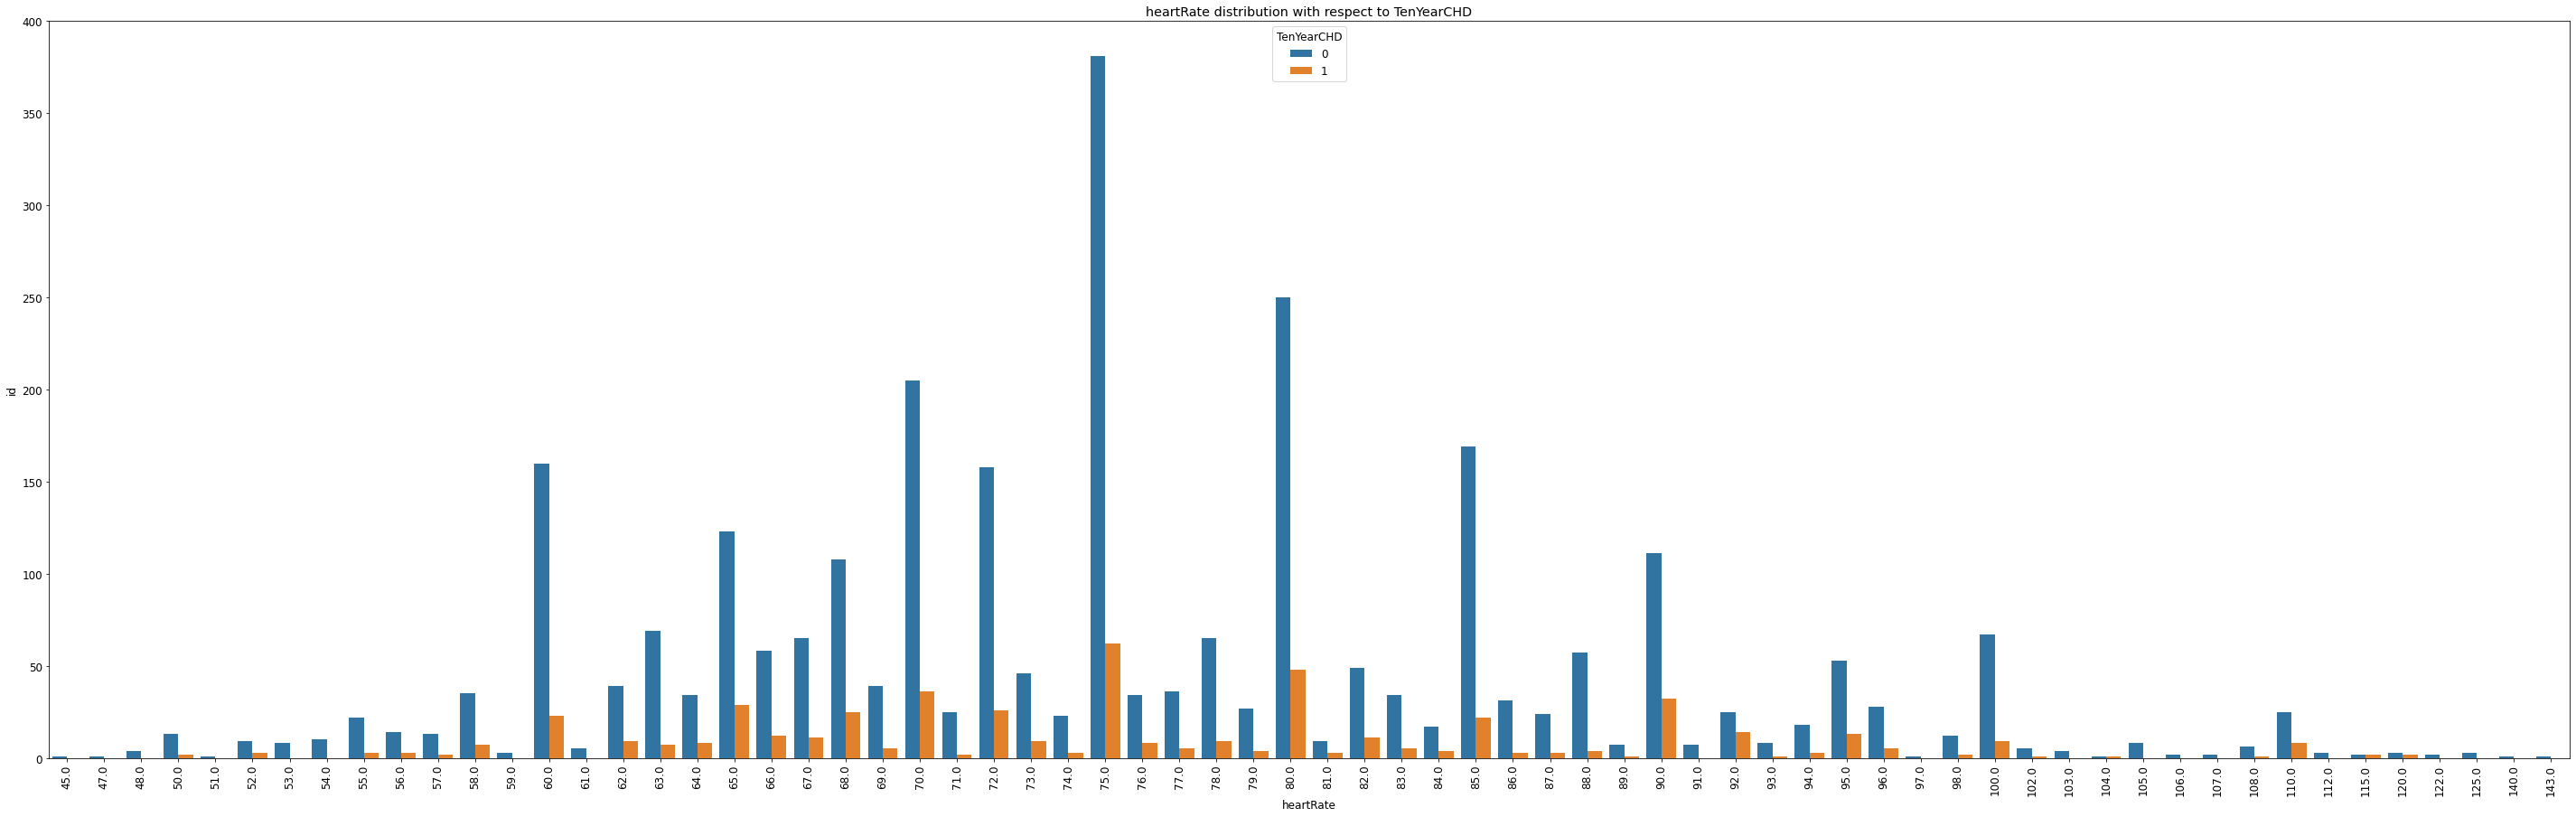

In [ ]:
#Distribution of "heartRate" feature with respect to "TenYearCHD".
bar_wrt_TenYearCHD("heartRate")

####glucose

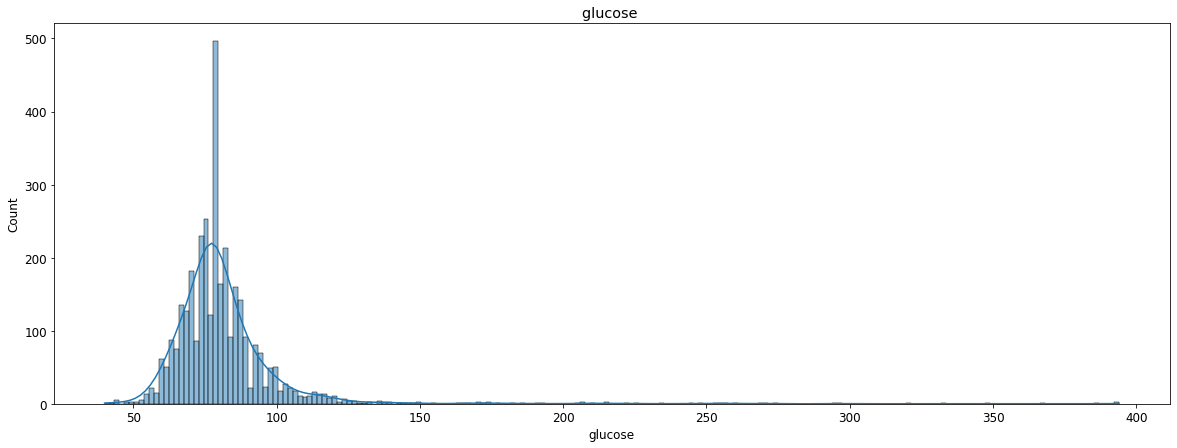

In [ ]:
#Distribution of feature "glucose".
hist_num("glucose")

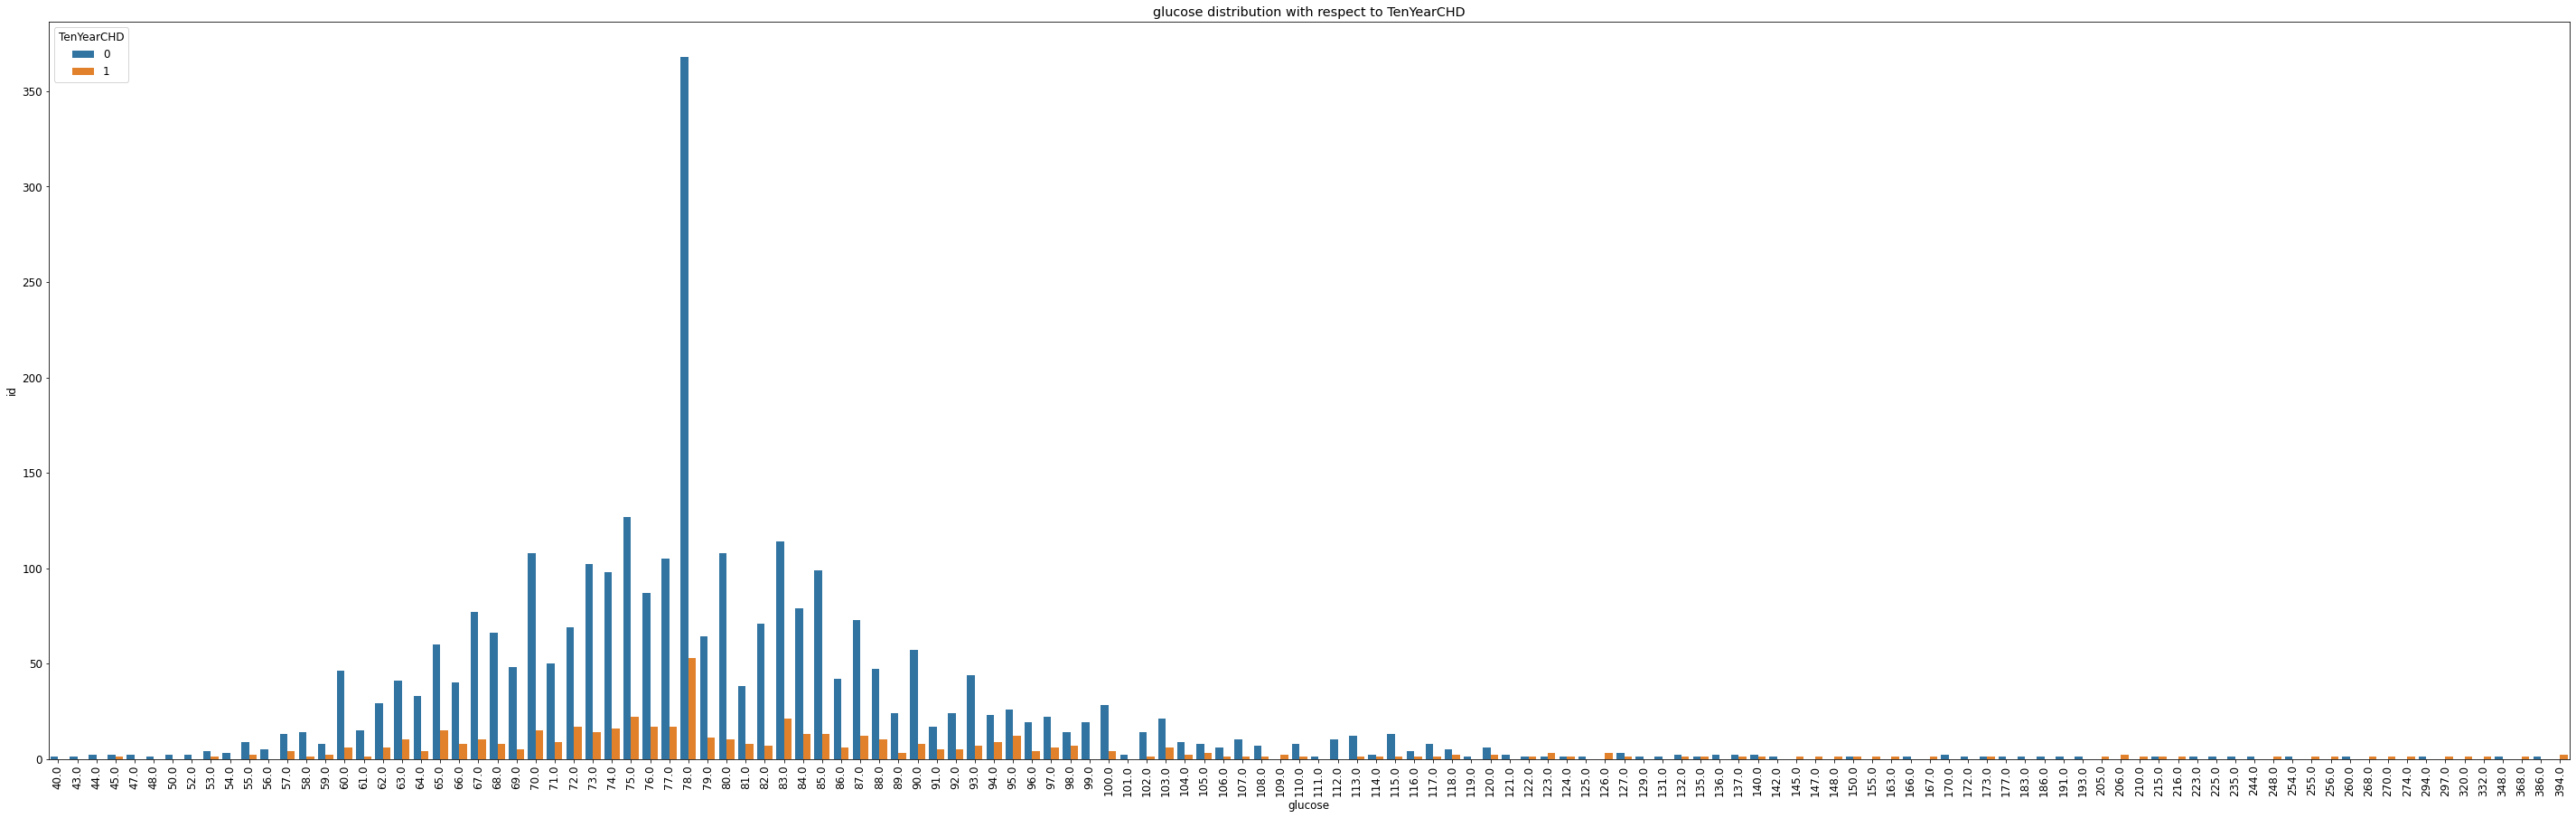

In [ ]:
#Distribution of "glucose" feature with respect to "TenYearCHD".
bar_wrt_TenYearCHD("glucose")

#### Chart - 3

In [ ]:
# Chart - 3 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

In [ ]:
# Chart - 4 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [ ]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [ ]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [ ]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***